<a href="https://colab.research.google.com/github/FreeeSoul/realFastCampus/blob/main/3_ch2_6real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [37]:
!ls -al '/content/drive/MyDrive/data'

total 5398
-rw------- 1 root root  337847 Jul 16 10:49 data_202001.csv
-rw------- 1 root root  314682 Jul 16 11:27 data_202002.csv
-rw------- 1 root root 4205435 Jul 16 13:52 data_2020_1_12.csv
-rw------- 1 root root  652442 Jul 16 11:43 data_2020.csv
drwx------ 2 root root    4096 Jul 16 10:47 .ipynb_checkpoints
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202001
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202002
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202003


#2. Load Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
file = '/content/drive/MyDrive/data/data_2020_1_12.csv'
data = pd.read_csv(file)

In [40]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3


In [41]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [42]:
data.groupby(['거리', '통행시간'])

In [43]:
data['거리'] = data['거리'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [44]:
data_clean = data[data['거리'].isin([135, 407])]
data_clean
#data.groupby(['요일', '집계시'])[].mean()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
174,20200101,10,101,135,5499,2
175,20200101,10,101,135,5329,2
176,20200101,20,101,135,5673,2
177,20200101,20,101,135,4662,2
178,20200101,4,101,135,5946,2
...,...,...,...,...,...,...
152857,20201231,17,101,407,15328,3
152860,20201231,2,101,135,4539,3
152861,20201231,20,101,407,17001,3
152862,20201231,6,101,135,4652,3


In [54]:
data_time = data_clean.groupby(['집계시', '요일', '거리'])['통행시간'].mean()
data_time

집계시  요일  거리 
0    0   135     5072.637037
         407    15549.675676
     1   135     5051.017391
         407    15983.102564
     2   135     5450.725000
                    ...     
23   4   407    17035.450980
     5   135     5431.022556
         407    16033.622222
     6   135     5254.222973
         407    15297.022727
Name: 통행시간, Length: 336, dtype: float64

In [62]:
data_distance = data_time.unstack(level=2)
# unstack은 행 방향(->)에 있는 요소 중 하나를 들어올려서 열방향으로 바꿔줌.
#행 방향 중 몇 번째를 들어올릴지는 level=2 이거로 결정. 집계시, 요일, 거리 -> 0, 1, 2로 할당됨
data_distance

거리              135           407
집계시 요일                           
0   0   5072.637037  15549.675676
    1   5051.017391  15983.102564
    2   5450.725000  15129.750000
    3   5263.705882  14533.189189
    4   5219.400000  15908.275000
...             ...           ...
23  2   5404.398601  16006.125000
    3   5627.057554  16118.288889
    4   6017.818182  17035.450980
    5   5431.022556  16033.622222
    6   5254.222973  15297.022727

[168 rows x 2 columns]

지금까지 도착지점을 두 군데(135, 407)로 좁힌다음 그 좁힌 두 군데 135, 407에 대한 집계시, 요일별 통행시간을 알아보기 위해 그룹화 기준을 '집계시', '요일', '거리'로 한  다음 출력값 '통행시간' 만 나타내도록 했다...여기까지 한 다음 이제 행에서 거리 부분 튀어나온 것을 일자로 펴주고 Dataframe 형태의 표를 리스트 형태로 바꾼다.(그래야 텐서플로우에서 조작하기 쉬우니까). 그 다음 x_train, y_train 정리하는 것까지 하려 함.

In [63]:
data_out = data_distance.reset_index()
# 지금 열로 바뀐 거리가 위로 튀어나와있으니까 다른 열들과 똑같이 일자로 딱딱 되게끔 하기
#위해 쓰는 코드
data_out

거리,집계시,요일,135,407
0,0,0,5072.637037,15549.675676
1,0,1,5051.017391,15983.102564
2,0,2,5450.725000,15129.750000
3,0,3,5263.705882,14533.189189
4,0,4,5219.400000,15908.275000
...,...,...,...,...
163,23,2,5404.398601,16006.125000
164,23,3,5627.057554,16118.288889
165,23,4,6017.818182,17035.450980
166,23,5,5431.022556,16033.622222


In [64]:
data_list = data_out.values.tolist()
data_list

[[0.0, 0.0, 5072.637037037037, 15549.675675675675],
 [0.0, 1.0, 5051.017391304348, 15983.102564102564],
 [0.0, 2.0, 5450.725, 15129.75],
 [0.0, 3.0, 5263.705882352941, 14533.18918918919],
 [0.0, 4.0, 5219.4, 15908.275],
 [0.0, 5.0, 5208.133802816901, 15321.372549019608],
 [0.0, 6.0, 4901.625, 14232.461538461539],
 [1.0, 0.0, 4942.333333333333, 15200.729166666666],
 [1.0, 1.0, 5088.949275362319, 15656.083333333334],
 [1.0, 2.0, 5324.818181818182, 15088.617021276596],
 [1.0, 3.0, 5245.3884892086335, 15112.045454545454],
 [1.0, 4.0, 5226.68992248062, 15188.155555555555],
 [1.0, 5.0, 5199.833333333333, 15066.396551724138],
 [1.0, 6.0, 4997.459016393443, 14635.577777777778],
 [2.0, 0.0, 5081.890756302521, 15057.040816326531],
 [2.0, 1.0, 5142.070921985815, 15581.347826086956],
 [2.0, 2.0, 5426.88275862069, 15345.9375],
 [2.0, 3.0, 5287.125, 15154.69642857143],
 [2.0, 4.0, 5360.228571428572, 15332.020408163266],
 [2.0, 5.0, 5279.361842105263, 14927.155172413793],
 [2.0, 6.0, 5056.12962962963

In [67]:
x_train = [r[:2] for r in data_list]
y_train = [r[2:] for r in data_list]

[[5072.637037037037, 15549.675675675675],
 [5051.017391304348, 15983.102564102564],
 [5450.725, 15129.75],
 [5263.705882352941, 14533.18918918919],
 [5219.4, 15908.275],
 [5208.133802816901, 15321.372549019608],
 [4901.625, 14232.461538461539],
 [4942.333333333333, 15200.729166666666],
 [5088.949275362319, 15656.083333333334],
 [5324.818181818182, 15088.617021276596],
 [5245.3884892086335, 15112.045454545454],
 [5226.68992248062, 15188.155555555555],
 [5199.833333333333, 15066.396551724138],
 [4997.459016393443, 14635.577777777778],
 [5081.890756302521, 15057.040816326531],
 [5142.070921985815, 15581.347826086956],
 [5426.88275862069, 15345.9375],
 [5287.125, 15154.69642857143],
 [5360.228571428572, 15332.020408163266],
 [5279.361842105263, 14927.155172413793],
 [5056.12962962963, 14741.063829787234],
 [5113.991803278688, 14961.714285714286],
 [5199.0, 15481.681818181818],
 [5511.544827586207, 15498.951219512195],
 [5294.248120300752, 15236.627450980392],
 [5338.013333333333, 15840.645

#3. Multi Variable and Output uisng Tensorflow

In [68]:
import tensorflow as tf
import numpy as np

In [69]:
learning_rate = 1e-4
learning_epochs = 5000

In [72]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2, )))
# Dense(2, input_shape=(2, )에서 첫 번째 파라미터는 unit개수라고 했지만, output개수를 입력
#하는 것과도 같다고 한다. 이번에는 출력 2개니 2 쓴다. 입력도 2개니 2 쓰고.
model.compile(loss=mse, optimizer=sgd)

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6/6 [==============================] - 0s 4ms/step - loss: 12907983.0000
Epoch 2502/5000
6/6 [==============================] - 0s 4ms/step - loss: 12909972.0000
Epoch 2503/5000
6/6 [==============================] - 0s 4ms/step - loss: 12906231.0000
Epoch 2504/5000
6/6 [==============================] - 0s 6ms/step - loss: 12902517.0000
Epoch 2505/5000
6/6 [==============================] - 0s 3ms/step - loss: 12903675.0000
Epoch 2506/5000
6/6 [==============================] - 0s 4ms/step - loss: 12899252.0000
Epoch 2507/5000
6/6 [==============================] - 0s 5ms/step - loss: 12896146.0000
Epoch 2508/5000
6/6 [==============================] - 0s 4ms/step - loss: 12894427.0000
Epoch 2509/5000
6/6 [==============================] - 0s 4ms/step - loss: 12893659.0000
Epoch 2510/5000
6/6 [==============================] - 0s 3ms/step - loss: 12895013.0000
Epoch 2511/5000
6/6 [==============================] - 0s 4ms/step - loss: 12883331.0000
E

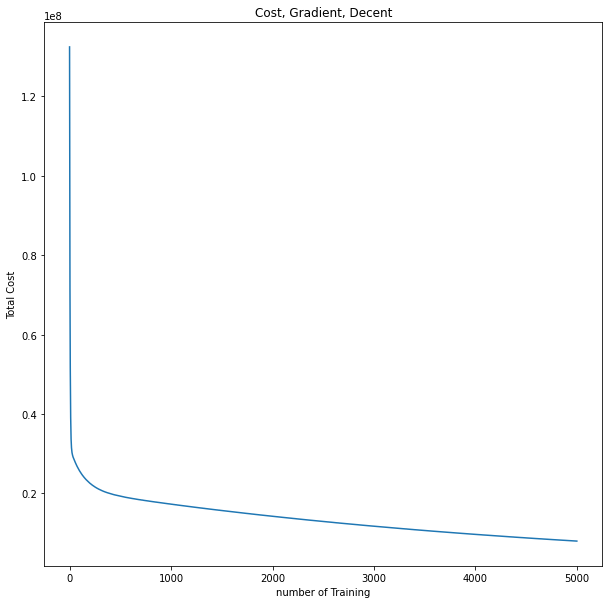

In [75]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.title('Cost, Gradient, Decent')
plt.ylabel('Total Cost')
plt.xlabel('number of Training')
plt.show()

In [76]:
Time = 14 #@param {type: 'slider', min:0, max:23, step:1}
Day = 3 #@param {type: 'slider', min:0, max:6, step:1}

In [78]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
data_out[time_condition & day_condition]

거리,집계시,요일,135,407
101,14,3,6077.381503,15936.189655


In [81]:
result = model.predict([[Time, Day]])
result

array([[ 5529.958, 15318.381]], dtype=float32)